In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv("train_ctrUa4K.csv")
df1=pd.read_csv("test_lAUu6dG.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df1.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [8]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
df.loc[(pd.isnull(df['Credit_History'])) & (df['Loan_Status']=='Y'),'Credit_History']=1
df.loc[(pd.isnull(df['Credit_History'])) & (df['Loan_Status']=='N'),'Credit_History']=0

In [10]:
df1['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [11]:
df1['Credit_History']=df1['Credit_History'].fillna(1)

In [12]:
df1['Credit_History']=df1['Credit_History'].replace(to_replace={1.0:1})

In [13]:
df1['Credit_History']=df1['Credit_History'].replace(to_replace={0.0:0})

In [14]:
df1['LoanAmount']=df1.groupby('Property_Area').LoanAmount.transform(lambda  x:x.fillna(x.mean()))

In [15]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [16]:
df['Self_Employed']=df['Self_Employed'].fillna('No')

In [17]:
df1['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [18]:
df1['Self_Employed']=df1['Self_Employed'].fillna('No')

In [19]:
df['Dependents']=df['Dependents'].replace(to_replace={'3+':'3'})

In [20]:
df['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [21]:
df1['Dependents']=df1['Dependents'].replace(to_replace={'3+':'3'})

In [22]:
df1['Dependents']=df1['Dependents'].fillna('0')

In [23]:
df['Dependents']=df['Dependents'].fillna('0')

In [24]:
df.dropna(subset=['Married'],inplace=True)

In [25]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,611.000000,611.000000,590.000000,597.000000,611.000000
mean,5399.513912,1627.972046,146.369492,341.909548,0.833061
std,6120.764249,2931.747971,85.729343,64.900325,0.373227
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2875.500000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1213.000000,127.500000,360.000000,1.000000
75%,5790.000000,2304.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


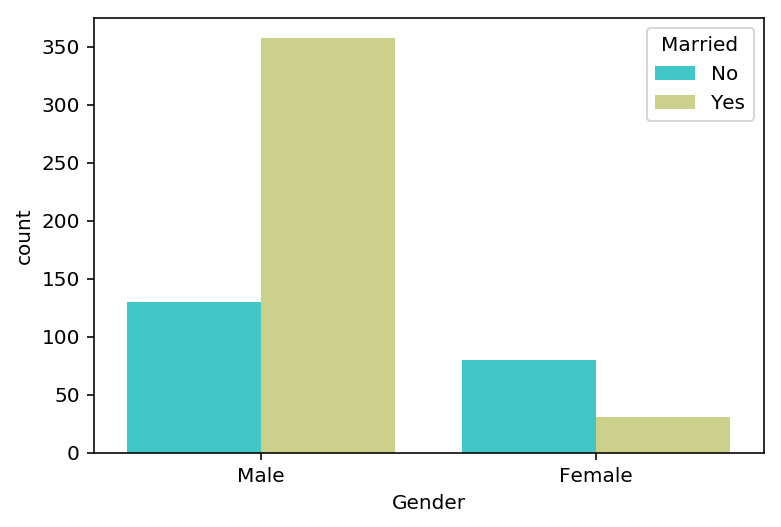

In [26]:
sns.countplot(x='Gender',hue='Married',data=df,palette='rainbow',linewidth=3.0)

In [27]:
df.loc[(pd.isnull(df['Gender'])) & (df['LoanAmount'].between(110, 170, inclusive = True) ), 'Gender']='Male'
df.loc[(pd.isnull(df['Gender'])) & (df['LoanAmount'].between(80, 140, inclusive = True) ), 'Gender']='Female'

In [28]:
df['Gender'].value_counts()

Male      494
Female    113
Name: Gender, dtype: int64

In [29]:
df.Gender=df.Gender.fillna('Male')

In [30]:
df1['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [31]:
df1.Gender=df1.Gender.fillna('Male')

In [32]:
df['LoanAmount'].max()

700.0

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [34]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116266,0.571061,-0.043120,-0.010350
CoapplicantIncome,-0.116266,1.000000,0.188898,-0.059618,-0.053767
LoanAmount,0.571061,0.188898,1.000000,0.039071,-0.024406
Loan_Amount_Term,-0.043120,-0.059618,0.039071,1.000000,-0.003986
Credit_History,-0.010350,-0.053767,-0.024406,-0.003986,1.000000


In [35]:
df['Loan_Amount_Term']=df.groupby('ApplicantIncome').Loan_Amount_Term.transform(lambda  x:x.fillna(x.mean()))

In [36]:
df['Loan_Amount_Term']=df.groupby('Property_Area').Loan_Amount_Term.transform(lambda  x:x.fillna(x.mean()))

In [0]:
df1['Loan_Amount_Term']=df1.groupby('ApplicantIncome').Loan_Amount_Term.transform(lambda  x:x.fillna(x.mean()))

In [0]:
df1['Loan_Amount_Term']=df1.groupby('Property_Area').Loan_Amount_Term.transform(lambda  x:x.fillna(x.mean()))

In [0]:
df['LoanAmount']=df.groupby('Property_Area').LoanAmount.transform(lambda  x:x.fillna(x.mean()))

In [0]:
df['Loan_Amount_Term'].value_counts()

In [0]:
#sns.boxplot(x='Self_Employed',y='ApplicantIncome',data=df)
sns.countplot(x='Education',hue='Self_Employed',data=df)

In [0]:
df_integer=df.select_dtypes(np.number)

In [0]:
df_category=df.select_dtypes(exclude=['int64','float64'])

In [0]:
df1_integer=df1.select_dtypes(np.number)

In [0]:
df1_category=df1.select_dtypes(exclude=['int64','float64'])

In [0]:
df1_integer.columns

In [0]:
enoded_df_category=pd.get_dummies(df_category.drop(['Loan_Status','Loan_ID'],axis=1))

In [0]:
enoded_df1_category=pd.get_dummies(df1_category.drop('Loan_ID',axis=1))

In [0]:
x=pd.concat([df_integer,enoded_df_category],axis=1)
y=df['Loan_Status']

In [0]:
enoded_df_category.shape

In [0]:
enoded_df1_category.shape

In [0]:
x_test=pd.concat([df1_integer,enoded_df1_category],axis=1)

In [0]:
x.columns#.shape

In [0]:
x_test.columns#.shape

In [0]:
print(x_test.isnull().sum()>0)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
     x, y, test_size=0.20, random_state=42)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
lr=LogisticRegression()

In [0]:
lr.fit(X_train,y_train)

In [0]:
predict=lr.predict(X_test)

In [0]:
df_results = pd.DataFrame(list(y_test),columns=['Actual'])
df_results['Predicted']= pd.Series(list(predict), index=df_results.index)

In [0]:
df_results.head()

In [0]:
predict1=lr.predict(x_test)

In [0]:
df1['Loan_status']=predict1

In [0]:
df1[['Loan_ID','Loan_status']].head()

In [0]:
df_results.head()

In [0]:
print(accuracy_score(y_test,predict))

In [0]:
print(confusion_matrix(y_test,predict))

In [0]:
print(classification_report(y_test,predict))

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [0]:
def fit_predict(X_train, X_test, y_train, y_test,max_depth = None,
            n_estimators=20, max_features ='auto', min_samples_split =2,scaler=None):
    if scaler:
        train = scaler.fit_transform(X_train)
        test = scaler.transform(X_test)        
    RF = RandomForestClassifier(n_estimators = n_estimators, max_depth=max_depth, 
                                random_state = 42, max_features = max_features,
                               min_samples_split = min_samples_split)
    RF.fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    print(accuracy_score(y_test, y_pred))

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf1=RandomForestClassifier()

In [0]:
rf1.fit(x,y)

In [0]:
rf1.feature_importances_

In [0]:
a=zip(list(x.columns),list(rf1.feature_importances_))

In [0]:
sorted(list(zip(list(df.columns),list(rf1.feature_importances_))),key=lambda x:x[1],reverse=True)

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
print('baseline accuracy score', end = ': ')
fit_predict(X_train, X_test, y_train, y_test)
print('baseline accuracy score with scaler', end = ': ')
fit_predict(X_train, X_test, y_train, y_test,scaler=StandardScaler())

In [0]:
for n_estimators in range(20,200,10):
     print(" accuracy Score using n_estimators",n_estimators, end = ': ')
     fit_predict(X_train, X_test, y_train, y_test,n_estimators = n_estimators)

In [0]:
for max_depth in range(1,20):
    print('Accuracy score using max_depth =', max_depth, end = ': ')
    fit_predict(X_train, X_test, y_train, y_test,n_estimators = 100,max_depth = max_depth)

In [0]:
for max_features in np.linspace(0.1,1,10):
    print('Accuracy score using max_features =', max_features, end = ': ')
    fit_predict(X_train, X_test, y_train, y_test,n_estimators = 100,max_depth = 8,max_features=max_features)

In [0]:
for min_samples_split in range(2,10):
    print('Accuracy score using min_samples_split =', min_samples_split, end = ': ')
    fit_predict(X_train, X_test, y_train, y_test,n_estimators = 100,max_depth = 8,max_features=0.4,min_samples_split=min_samples_split)

In [0]:
print('tuned accuracy score', end = ': ')
fit_predict(X_train, X_test, y_train, y_test,n_estimators = 100,max_features = 0.4,min_samples_split=7,max_depth = 8)
print('tuned accuracy score with scaler', end = ': ')
fit_predict(X_train, X_test, y_train, y_test,n_estimators = 100,max_features = 0.4,min_samples_split=7,
            max_depth = 8,scaler=StandardScaler())

In [0]:
original_score = 0.8292682926829268
best_score = 0.8780487804878049
improvement = np.abs(np.round(100*(original_score - best_score)/original_score,2))
print('overall improvement compare to non tuned model is {} %'.format(improvement))